In [1]:
from torch import nn
# import torch
import argparse
import numpy as np
import os
import anndata
import scanpy as sc

# from modules import network,mlp
# from modules.memory_bank import StaticMemoryBank_for_MSLOSS_SelfEnhanced
# from modules.multi_similarity_loss import MultiSimilarityLoss, MultiSimilarityLoss_Boost
from utils import yaml_config_hook,save_model,data_preocess
# from evaluation import  evaluation_tools
import warnings
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.sparse
import pandas  as pd
warnings.filterwarnings("ignore")

1
2
(8569, 20125)


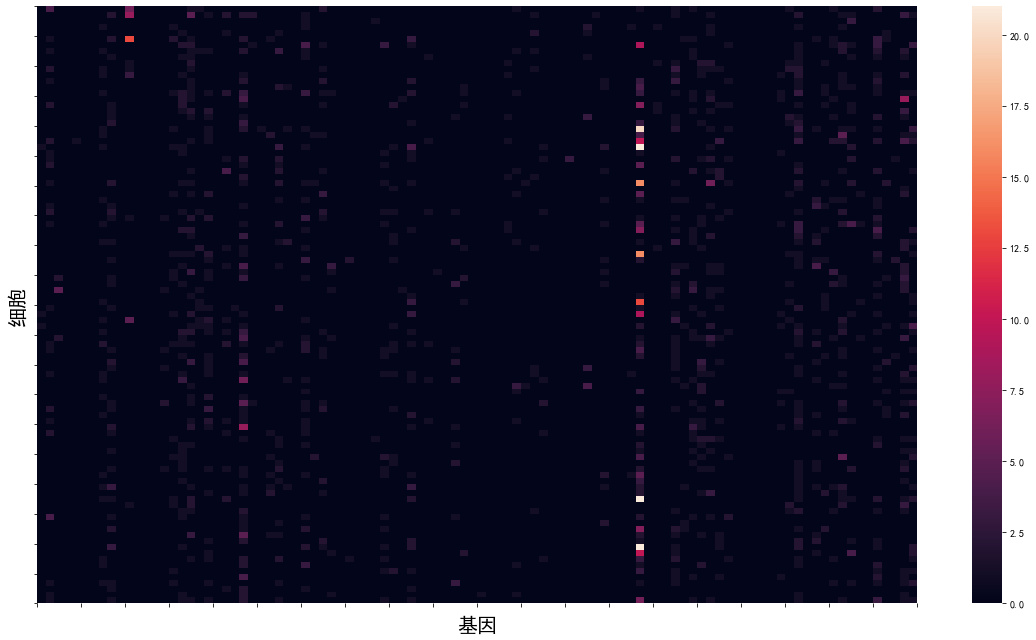

In [18]:
sparse_X = scipy.sparse.load_npz('data\\filtered_Counts.npz')
annoData = pd.read_table('data\\annoData.txt')
y = annoData["cellIden"].to_numpy()
high_var_gene = 2000

adataSC = anndata.AnnData(X=sparse_X, obs=np.arange(sparse_X.shape[0]), var=np.arange(sparse_X.shape[1]))
# sc.pp.filter_genes(adataSC, min_cells=10)
adataSC.raw = adataSC
# sc.pp.highly_variable_genes(adataSC, n_top_genes=high_var_gene, flavor='seurat_v3')
# sc.pp.normalize_total(adataSC, target_sum=1e4)
# sc.pp.log1p(adataSC)
print('1')
# print(adataSC.var)
# adataNorm = adataSC[:, adataSC.var.highly_variable]
dataframe = adataSC.to_df()
print('2')
x_ndarray = dataframe.values.squeeze()
print(x_ndarray.shape)
# y_ndarray = np.expand_dims(y, axis=1)
plt.figure(figsize=(16,9))
plt.rcParams['font.sans-serif']=['SimHei']
ax=sns.heatmap(x_ndarray[0:100,0:100])
# ax.set_xticks(np.arange(0,101,step=5))
ax.set_xlabel('基因',fontsize=20)
# ax.set_yticks(np.arange(0,101,step=5))
ax.set_ylabel('细胞',fontsize=20)
plt.xticks(np.arange(0,101,step=5))
plt.yticks(np.arange(0,101,step=5))
plt.tight_layout()
# plt.title('Baron 数据集随机100个样本的100对基因数据热度图',fontsize=20)

In [17]:
print(len(x_ndarray[x_ndarray==0])/8569/20125)

0.9062240736324567
